<h1>Visualisasi Menengah 2<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Visualizing-Data-Using-Matplotlib" data-toc-modified-id="Visualizing-Data-Using-Matplotlib-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualizing Data Using Matplotlib</a></span></li><li><span><a href="#Waffle-Charts" data-toc-modified-id="Waffle-Charts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Waffle Charts</a></span></li><li><span><a href="#Word-Clouds" data-toc-modified-id="Word-Clouds-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Word Clouds</a></span></li><li><span><a href="#Regression-Plots" data-toc-modified-id="Regression-Plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Regression Plots</a></span></li></ul></div>

# Introduction

Di section ini, kita akan belajar cara membuat word cloud dan waffle charts. Library visualisasi tambahan yang berbasis Matplotlib, yaitu library seaborn, dan plot regresi menggunakan library seaborn

In [1]:
import numpy as np # useful for many scientific computing in python
import pandas as pd  # primary data structure library
from PIL import Image # converting images into arrays
#import colormap
from matplotlib import cm

df_can = pd.read_excel("Data/Canada2.xlsx", sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=20)
print('Data downloaded and Read into a dataframe!')

Data downloaded and Read into a dataframe!


In [2]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Kita cari tahu berapa banyak entri di kumpulan data kita

In [3]:
# print the dimension of the dataframe
print(df_can.shape)

(177, 43)


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Bersihkan data. kita akan melakukan beberapa modifikasi pada dataset asli untuk mempermudah pembuatan visualisasi.

In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# lets rename the columns so that they make sense
df_can.rename (columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index -useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980,2014)))
print('data dimension: ', df_can.shape)

data dimension:  (177, 38)


C:\Users\Asus\AppData\Local\Temp/ipykernel_13932/2508287871.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis = 1)


In [6]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


# Visualizing Data Using Matplotlib

In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot') #optional: for ggplot-like style

# check for latest version of matplotlib
print('Matplotlib version: ', mpl.__version__) #>=2.0.0

Matplotlib version:  3.4.3


# Waffle Charts

Waffle chart adalah visualisasi menarik yang biasanya dibuat untuk menampilkan progress menuju tujuan. Waffle chart biasanya merupakan opsi yang efektif saat kalian mencoba menambahkan fitur visualisai yang menarik Cocok yang sebagian besar terdiri dari sel seperti dasbor excel.

In [8]:
# lets create a new dataframe for these three countries
df_dsn = df_can.loc[['Denmark','Norway','Sweden'], :]

# lets take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Waffle charts tidak built in dalam pustaka visualisasi Python. Kita akan membuatnya dari awal.

__Step 1 :__ Langkah pertama menentukan proposisi setiap kategori sehubungan dengan totalnya

In [9]:
# compute the proportion of each category with respect to the total 
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value)/total_values) for value in df_dsn['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ':' +str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


__Step 2:__ Langkah kedua adalah menenetukan ukuran keseluruhan dari waffle chart

In [10]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total numbe rof tiles

print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


__Step 3 :__ Langkah ketiga adalah menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori

In [11]:
# compute the number of tiles for each category
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i]+':'+str(tiles))

Denmark:129
Norway:77
Sweden:194


Berdasarkan proposisi yang dihitung, Denmark 129 ubin, norwegia 77 ubin, swedia 194 ubin.

__Step 4 :__ Langkah keempat adalah membuat matriks yang menyerupai wafel dan menyerupaigisinya.

In [12]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop throught waffle chart
category_index = 0
title_index = 0

#populate the waffle chart
for col in range(width):
    for row in range(height):
        title_index +=1
        
        # jika jumlah ubin yang diisi untuk kategori saat ini sama dengan ubin yang dialokasikan terkait.. 
        if title_index > sum(tiles_per_category[0:category_index]):
            # .. proceed to the next category
            category_index +=1
            
        # atur nilai kelas menjadi bilangan bulat, yang meningkat seiring dengan kelas 
        waffle_chart[row, col] = category_index 

print('Waffle chart populated!')
        

Waffle chart populated!


In [13]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

Seperti yang diharapkan, matrkis terdiri dari tiga kategori dan jumlah instance setiap kategori sesuai dengan jumlah ubin yang dialokasikan u/ setiap kategori.

__Step 5__: Petakan matriks waffle chart menjadi visual

In [14]:
# instantiate a new figure object
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

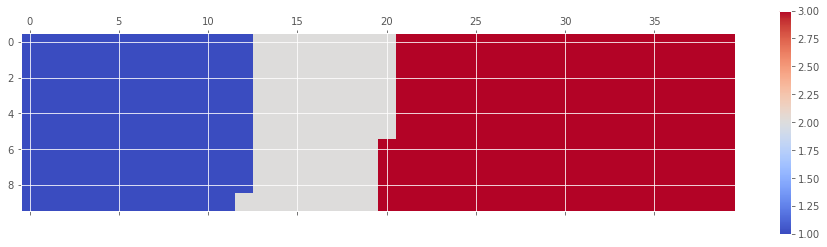

In [15]:
# use matshow to display the waffle chart

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

__Step 6 : __ Percantik chart

([], [])

<Figure size 432x288 with 0 Axes>

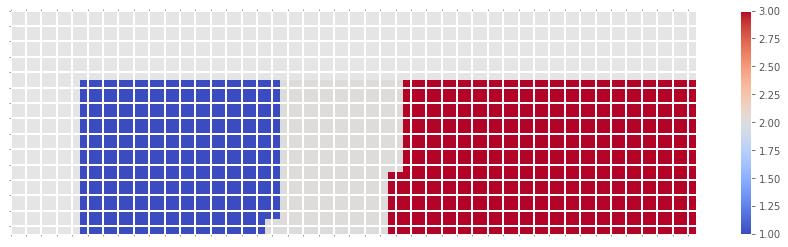

In [16]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-5, (width), 1), minor=True)
ax.set_yticks(np.arange(-5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

__Sesi 7__: Tambahkan legend

<Figure size 432x288 with 0 Axes>

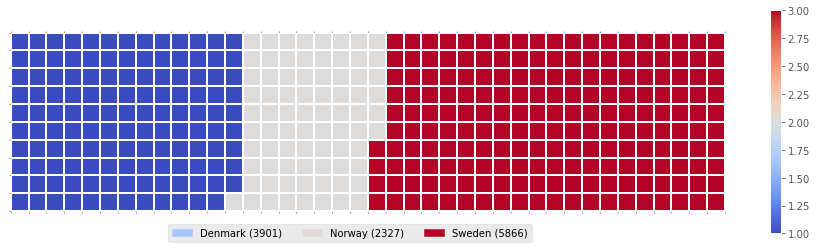

In [17]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

Mari, kita gabungkan ketujuh langkah menjadi satu fungsi yang disebut create_waffle_chart. Fungsi ini akan mengambil parameter :
1. categories: Kategori atau kelas unik dalam kerangka data.
2. values: Nilai yang sesuai dengan kategori atau kelas.
3. height: Ketinggian grafik wafel yang ditentukan.
4. width: Lebar yang ditentukan dari bagan wafel.
5. colormap: Kelas peta warna
6. value_sign: Untuk membuat fungsi kita lebih dapat digeneralisasikan, kita akan menambahkan parameter ini ke tanda alamat yang dapat diasosiasikan dengan nilai seperti %, $, dan seterusnya. value_sign memiliki nilai default string kosong. 


In [18]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    

Sekarang, untuk membuat waffle, yang kharus kita lakukan adalah memanggil fungsi create_waffle_chart.


In [19]:

width = 40
height = 10

categories = df_dsn.index.values
values = df_dsn['Total']

colormap= plt.cm.coolwarm

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

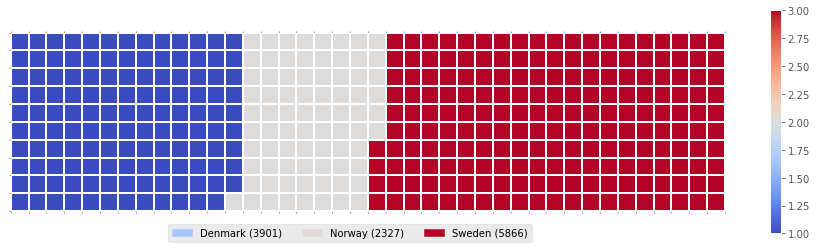

In [20]:
create_waffle_chart(categories, values, height, width, colormap)

# Word Clouds 

Word Coulds/ text clouds bekerja dengan cara sederhana; semakin banyak kata tertentu muncul dalam sumber tekstual(pidato, posting blog, atau database) semakinakin besar dan tebal kata itu muncul di kata could.

p

In [21]:
# import pacakge and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
print('WordCloud is installed and imported!')

WordCloud is installed and imported!


Word coulds biasanya digunakan untuk melakukan analisis tingkat tinggi dan visualisasi data teks. Mari kita lanjutkan dengan menganalisis novel pendek karangan Lewis carrol berjudul Alice's Adventures in Wonderland

In [22]:
# open the file and read it into a variable alice_novel
alice_novel = open('Data/alice_novel.txt','r').read()
print('File saved!')

File saved!


Mari Gunakan stopwords yang kita impor dari word_could. kita menggunakan set untuk menghapus stopword yang berlebihan.

In [23]:
stopwords = set(STOPWORDS)

Buat word cloud object dan generate word could. Agar lebih ringkas word cloud hanya dengan menggunakan 2000kata pertama dalam novel

In [24]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=200,
    stopwords=stopwords,
    colormap='PiYG')

# generate the word cloud
alice_wc.generate(alice_novel)

Word cloud sudah dibuat. mari kita visualisasikan

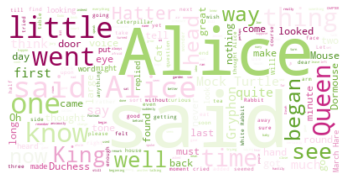

In [25]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Mari kita ubah ukuran cloud sehingga kita dapat melihat kata-kata yang jarang digunakan dengan lebih baik.

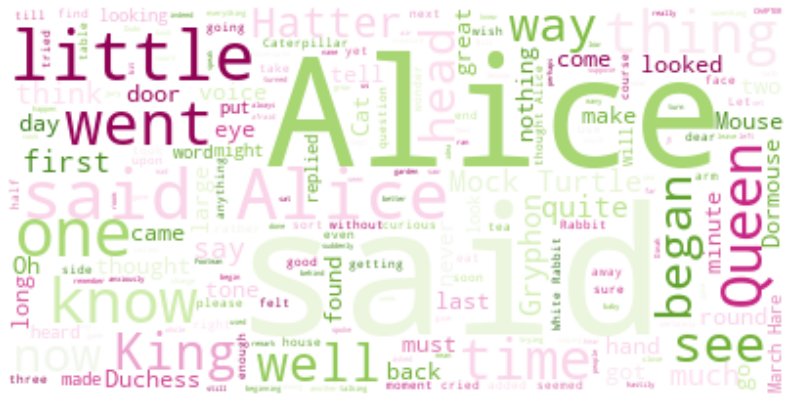

In [26]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Jauh lebih baik!
Namun, __said__ bukanlah kata yang informatif. Jadi, mari tambahkan ke stopwords kita dan buat ulang could

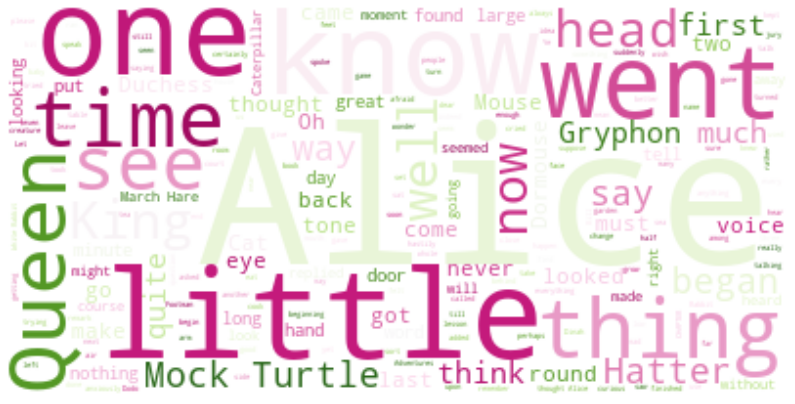

In [27]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Hal keren lainnya yang dapat diterapkan dnegan package word_clous adalah melapiskan kata-kata ke mask dalam bentuk apapun. Mari kita gunakan mask Alice dan kelincinya. Kami sudah membuatkan mask, jadi mari lanjutkan dan beri nama alice_mask.png

In [28]:
# save mask to alice_mask
alice_mask = np.array(Image.open('Mask/alice_mask.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


Mari kita lihat bagaimana masking terlihat

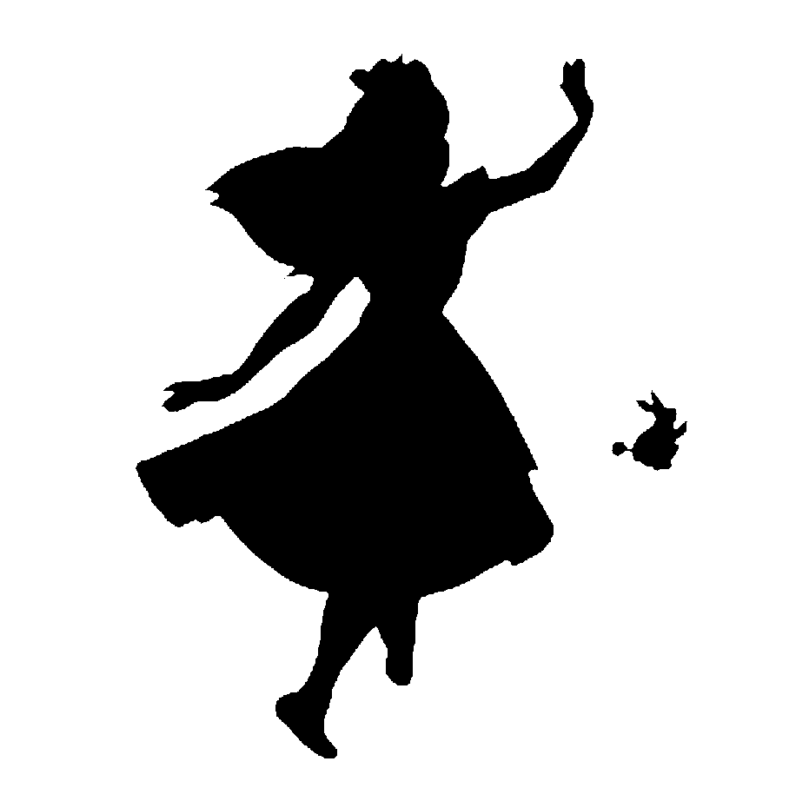

In [29]:
# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

# display the cloud
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Membentuk wordcloud sesuai dengan masking sangat mudah menggunakan word_cloud. Agar lebih simple, kita akan terus menggunakan 2000 kata pertama dalam novel.

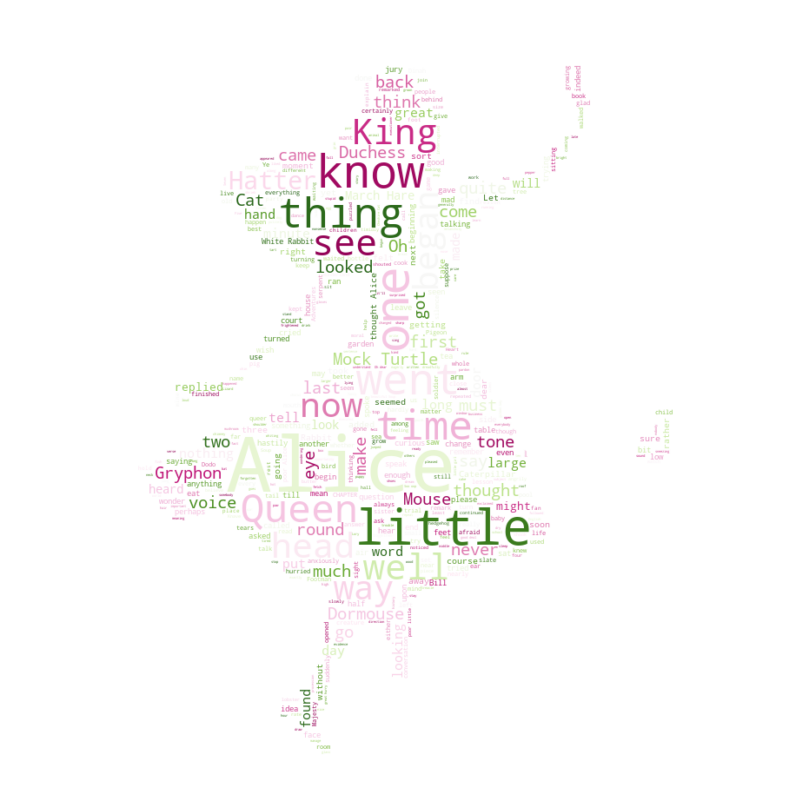

In [30]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    mask= alice_mask,
    stopwords=stopwords,
    colormap='PiYG')

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Mari kita buat contoh data teks dari dataset imigrasi kita, katakanlah data teks 90 kata.

In [31]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [32]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, Afghanistan to Tunisia
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  177 non-null    object
 1   Region     177 non-null    object
 2   DevName    177 non-null    object
 3   1980       177 non-null    int64 
 4   1981       177 non-null    int64 
 5   1982       177 non-null    int64 
 6   1983       177 non-null    int64 
 7   1984       177 non-null    int64 
 8   1985       177 non-null    int64 
 9   1986       177 non-null    int64 
 10  1987       177 non-null    int64 
 11  1988       177 non-null    int64 
 12  1989       177 non-null    int64 
 13  1990       177 non-null    int64 
 14  1991       177 non-null    int64 
 15  1992       177 non-null    int64 
 16  1993       177 non-null    int64 
 17  1994       177 non-null    int64 
 18  1995       177 non-null    int64 
 19  1996       177 non-null    int64 
 20  1997       177 non-null

Berapa total imigrasi dari 1980-2013?

In [33]:
total_immigration = df_can['Total'].sum()
total_immigration

5376471

In [34]:
df_can.index.values

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong Special Administrative Region',
       'China, Macao Special Administrative Region', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 

Menggunakan contries dengan nama satu kata, mari kita duplikat nama masing-masing negara berdasarkan kontribusi mereka terhadap total imigrasi

In [35]:
max_words = 90
word_string= ''
for Country in df_can.index.values:
    #check if country's name is a single-word name
    if len(Country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[Country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((Country + ' ')*repeat_num_times)
        
#display the generated text
word_string

'Algeria Bangladesh China China China China China China China China China China China Colombia Egypt France Germany Guyana Haiti India India India India India India India India India India India Iraq Israel Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Poland Portugal Romania '

Kita tidak berusuan dnegan stopwords, jadi tidak pelru passing saat membuat kata cloud.

In [36]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word could created')

Word could created


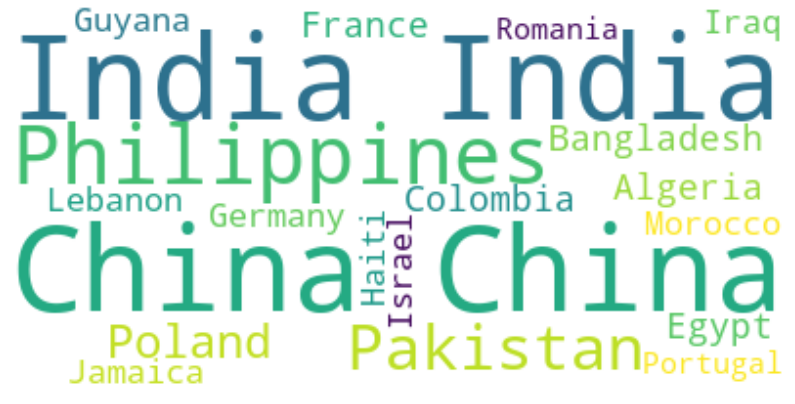

In [37]:
# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

# display the cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plots

Di sesi ini, kita akan menjelajahi **seaborn** dan melihat seberapa efisiensnya membuat gais regresi dan menyesuaikan dengan pustaka ini

In [38]:
# import library
import seaborn as sns
print('Seaborn installed and imported')

Seaborn installed and imported


Buat data frame baru yang menyimpan jumlah total imigran yang mendarat ke Kanada per tahun dari 1980-2013

In [39]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,65079
1,1981.0,71801
2,1982.0,70635
3,1983.0,53952
4,1984.0,47877


Dengan seaborn, membuat plot regresi semudah memanggil fungsi regplot

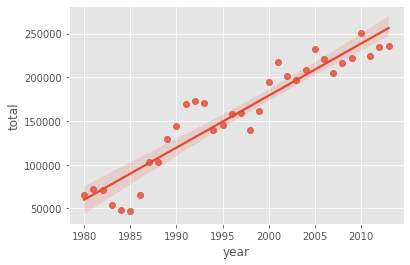

In [40]:
ax = sns.regplot(x='year', y='total', data=df_tot)

Kita juga dapat menyesuaikan warna scatter plot dan garis regresi. Kita ubah warnanya menjadi hijau.

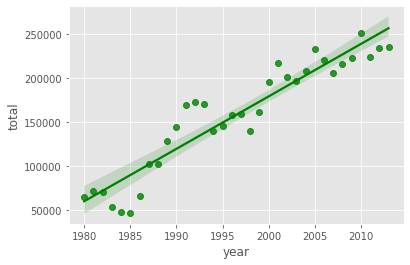

In [41]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

Kita selalu dapat menyesuaikan bentuk marker, jadi sebagai ganti circular markes mari gunakan '+'

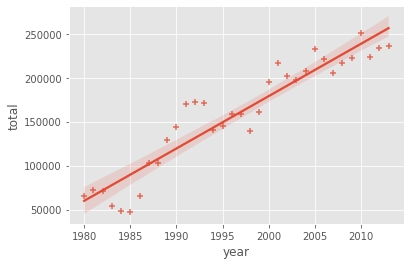

In [42]:
ax = sns.regplot(x='year', y='total', data=df_tot, marker='+')

Mari perbesar plotnya sedikit sehingga lebih menarik untuk dilihat.

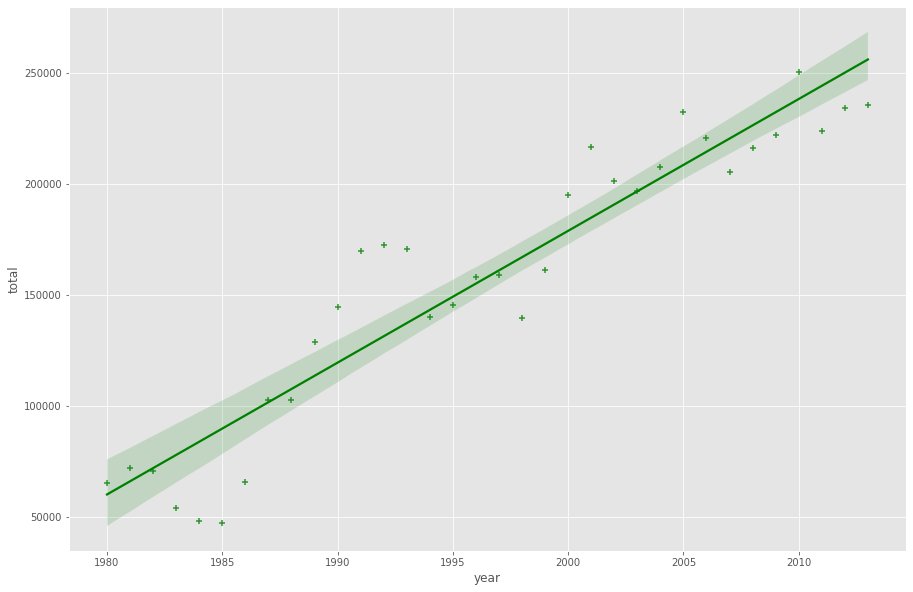

In [43]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Dan mari kita tingkatkan ukuran marker sehingga cocok dengan ukuran baru dari gambar tersebut, darin tambahkan judul serta label x dan y

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

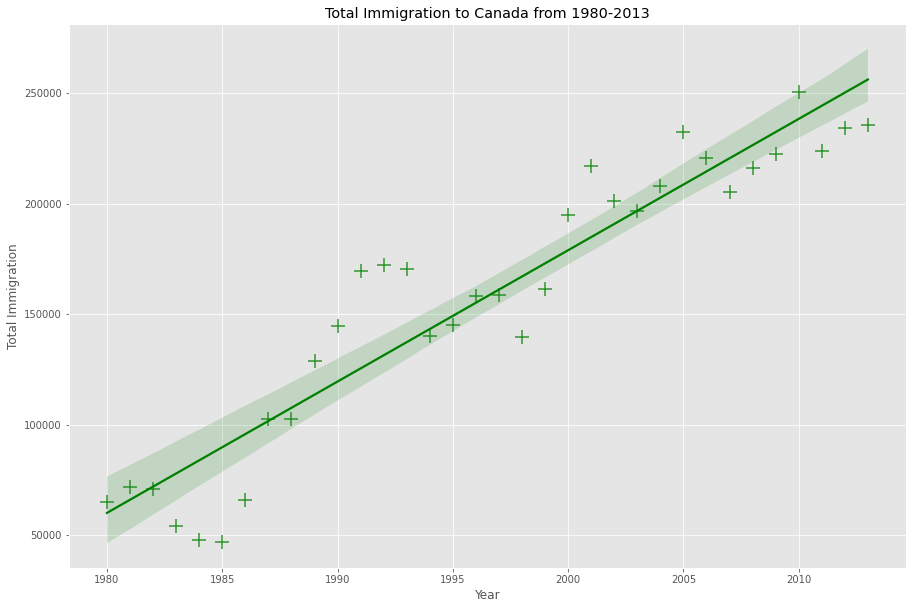

In [44]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y- labels
ax.set_title('Total Immigration to Canada from 1980-2013') #add title

Dan terakhir, tingkatkan ukuran font pada label tanda centang, judul, dan label x dan y agar tidak terlihat berbeda

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

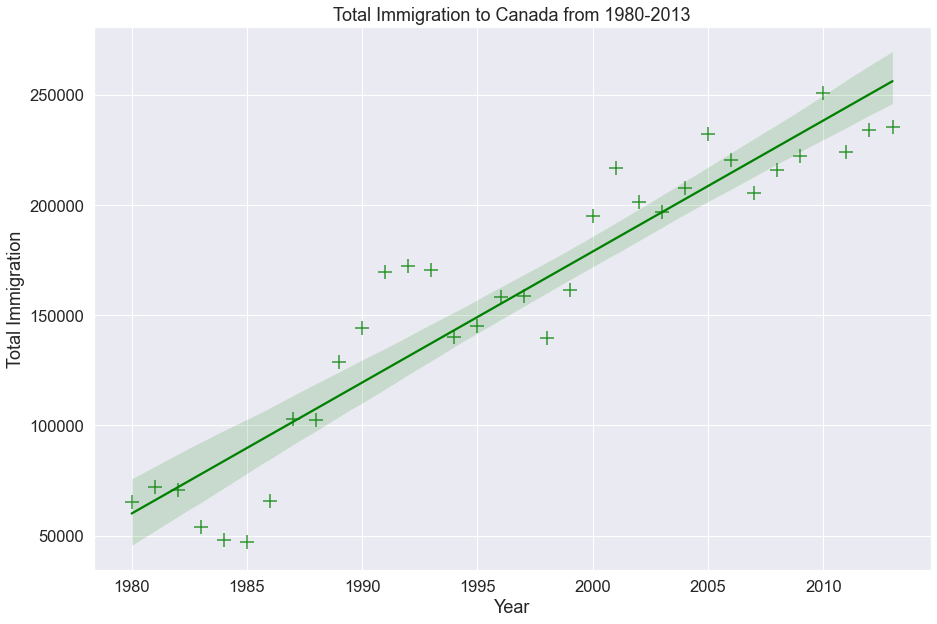

In [45]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)

ax= sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

Luar biasa! Scatter plot lengkap denagn regression fit dnegan hanya 5 baris kode.

Mengubah gaya ke latar belakang polos putih

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

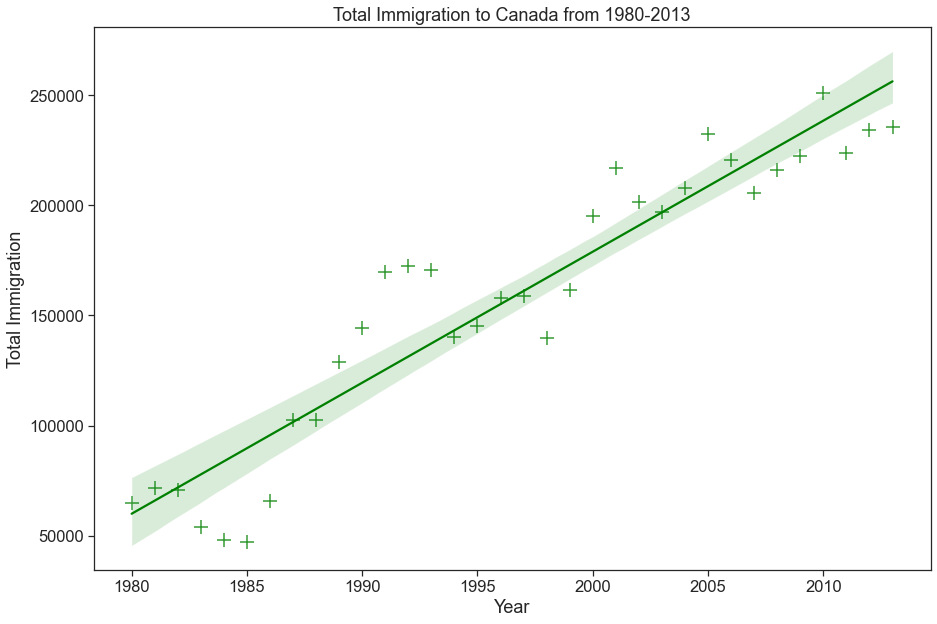

In [46]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax= sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

Atau ke latar belakang putih dengan garis kisi/garid lines

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

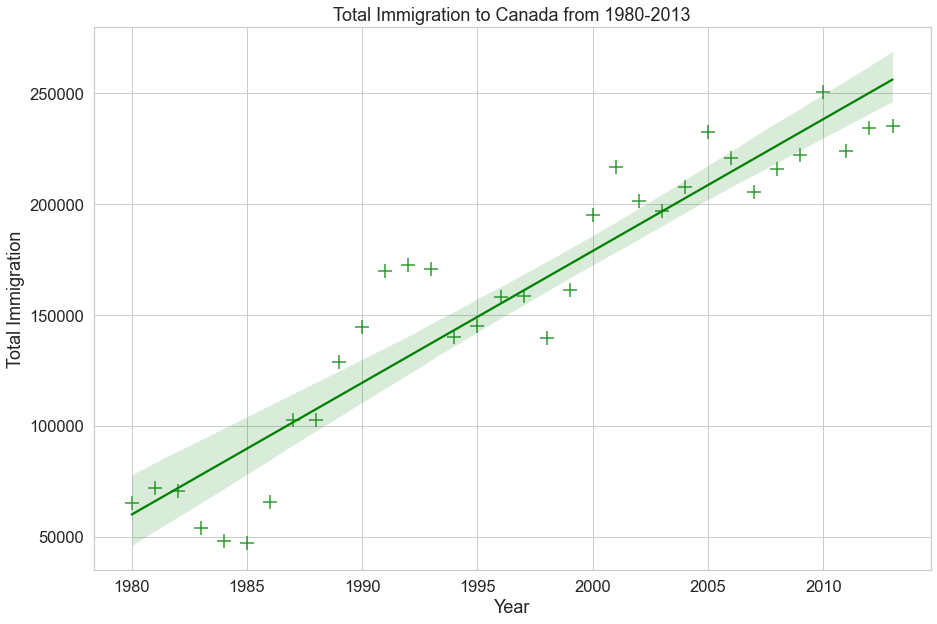

In [47]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax= sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

**Question** : Use seaborn to create s scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980-2013

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980-2013')

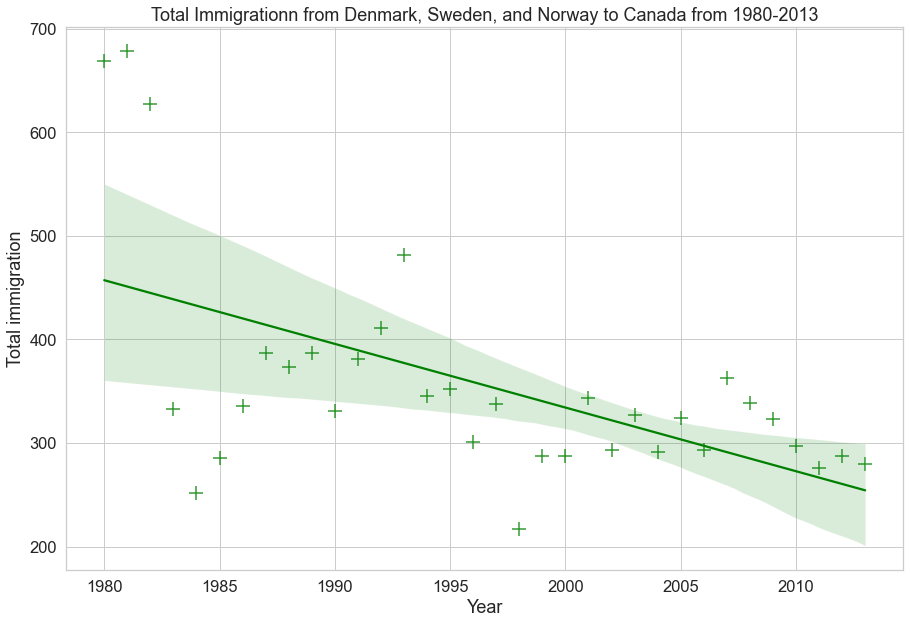

In [48]:
### type your answer here

# create df_countries dataframe
df_countries = df_can.loc[['Denmark','Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns=['year', 'total']

# change column year from string to into to create scatter plot
df_total['year']=df_total['year'].astype(int)

# define figure size
plt.figure(figsize=(15,10))

# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generate plot and title and axes labels
ax=sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980-2013')